## TP Digital Social Score 

In [1]:
!pip install pandas 
!pip install numpy 

In [2]:
import pandas as pd 
import numpy  as np 

/opt/conda/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [4]:
dataframe_sample = pd.read_csv('cleaned_training_sample.csv')

In [5]:
df_text = pd.read_csv('train.csv')


In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [8]:
pd.set_option('display.max_colwidth', None)

In [9]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


# NER 

In [11]:
!pip install spacy 
!pip install nltk 

In [12]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.9 MB/s  0:00:00eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [13]:
# 1) Make sure pip itself is up to date
!pip install -qU pip

# 2) Pin versions that play nicely together
!pip install -qU "numpy==1.26.4" "h5py==3.10.0"

# 3) Install spaCy + matching thinc
!pip install -qU "spacy==3.7.4" "thinc==8.2.5"

# 4) Download the small English model
!python -m spacy download en_core_web_sm


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
import spacy 
import requests 
from bs4 import BeautifulSoup
nlp = spacy.load("en_core_web_sm")

In [15]:
!pip uninstall -y seaborn scipy numpy matplotlib pandas
!pip install -q --no-cache-dir "numpy==1.26.4" "scipy==1.11.4" "pandas==2.2.2" "matplotlib==3.8.4" "seaborn==0.13.2"


Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: matplotlib 3.8.4
Uninstalling matplotlib-3.8.4:
  Successfully uninstalled matplotlib-3.8.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_6494/3531911753.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.values,


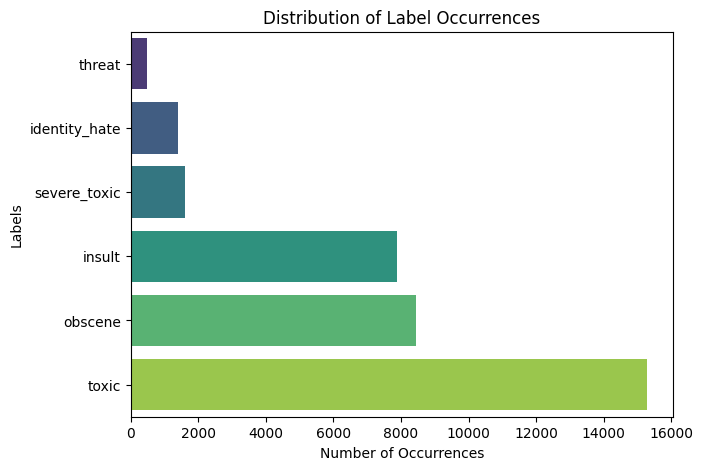

In [17]:
column_labels = df.columns.tolist()[2:]
label_counts = df[column_labels].sum().sort_values()


# Create a black background for the plot
plt.figure(figsize=(7, 5))

# Create a horizontal bar plot using Seaborn
ax = sns.barplot(x=label_counts.values,
                 y=label_counts.index, palette='viridis')


# Add labels and title to the plot
plt.xlabel('Number of Occurrences')
plt.ylabel('Labels')
plt.title('Distribution of Label Occurrences')

# Show the plot
plt.show()

/tmp/ipykernel_6494/252520945.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Category', data=plot_data, palette='viridis')


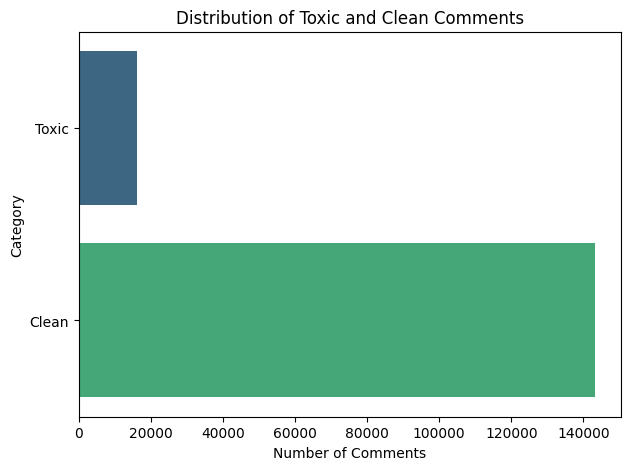

In [18]:
# Create subsets based on toxic and clean comments
train_toxic = df[df[column_labels].sum(axis=1) > 0]
train_clean = df[df[column_labels].sum(axis=1) == 0]

# Number of toxic and clean comments
num_toxic = len(train_toxic)
num_clean = len(train_clean)

# Create a DataFrame for visualization
plot_data = pd.DataFrame(
    {'Category': ['Toxic', 'Clean'], 'Count': [num_toxic, num_clean]})

# Create a black background for the plot
plt.figure(figsize=(7, 5))

# Horizontal bar plot
ax = sns.barplot(x='Count', y='Category', data=plot_data, palette='viridis')


# Add labels and title to the plot
plt.xlabel('Number of Comments')
plt.ylabel('Category')
plt.title('Distribution of Toxic and Clean Comments')

# Set ticks' color to white
ax.tick_params()

# Show the plot
plt.show()

In [19]:
# Randomly sample 15,000 clean comments
train_clean_sampled = train_clean.sample(n=16225, random_state=42)

# Combine the toxic and sampled clean comments
dataframe = pd.concat([train_toxic, train_clean_sampled], axis=0)

# Shuffle the data to avoid any order bias during training
dataframe = dataframe.sample(frac=1, random_state=42)

In [20]:
dataframe.to_csv("output.csv", index=False)


In [21]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

def anonymize_text(text):
    doc = nlp(text)
    anonymized_text = text
    offset = 0

    for ent in doc.ents:
        if ent.label_ in ["PERSON", "ORG", "GPE", "LOC", "FAC"]:
            start = ent.start_char + offset
            end = ent.end_char + offset
            replacement = f"[{ent.label_}]"
            anonymized_text = anonymized_text[:start] + replacement + anonymized_text[end:]
            offset += len(replacement) - (end - start)
    
    return anonymized_text

# dataframe["anonymized_comment"] = dataframe["comment_text"].apply(anonymize_text)


In [22]:
import re

email_pattern = r'\b[\w\.-]+@[\w\.-]+\.\w+\b'
phone_pattern = r'\b\d{10}\b'  # adjust to your format

def remove_regex(text):
    text = re.sub(email_pattern, "[EMAIL]", text)
    text = re.sub(phone_pattern, "[PHONE]", text)
    return text



In [23]:
# dataframe["anonymized_comment"] = dataframe["comment_text"].apply(lambda x: anonymize_text((x)))
# dataframe 
# dataframe["anonymized_comment"] = dataframe["anonymized_comment"].apply(lambda x: remove_regex(x))


In [24]:
dataframe

id  \
57737   9a8103881a1d8372   
46617   7c9a37dc040d6ef4   
83356   df07677ce31a782d   
34637   5c854590da41ac65   
27887   49cfe7691eb59201   
...                  ...   
19524   3391e899b12abdf6   
52404   8c37eb95400cbeca   
8141    15abaa783a453d4f   
155400  bd36b386754697e4   
57748   9a8d04f38385ca11   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [37]:
dataframe_sample = pd.read_csv('cleaned_training_sample.csv')

In [38]:
dataframe_sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,anonymized_comment
0,bc71e2d0cef5aa5a,0,0,0,0,0,0,""" WP:DYK Thank you for creating the Philip I, Duke of Pomerania article. If you create such an extensive article, you may want to consider adding inline references (per WP:CITE) and nominating it at T:TDYK for front page exposure. | talk """
1,9db5c942222b458d,0,0,0,0,0,0,"Missing info What about the fact that they have become far left communist marxists, way out of touch with mainstream [GPE]? (There are numerous reliable sources.)"
2,c3f8da0357c37a69,0,0,0,0,0,0,""" Your submission at [ORG] for creation Moses Bowness, Victorian Photographer 1834-8194, which you submitted to [PERSON] for creation, has been created. Please continue making quality contributions to [GPE]. Note that because you are a logged-in user, you can create articles yourself, and don't have to post a request. If you would like to help us improve this process, please consider Thank you for helping [ORG]! ► """
3,de8464700d89f327,0,0,0,0,0,0,Please stop writing to me
4,2008f92471f0e25d,0,0,0,0,0,0,Not satisfactorily. Throwing around wild accusations does not a justification make.


In [31]:
# dataframe_anonymized = dataframe.drop(columns=["comment_text"])


In [32]:
# dataframe_sample = dataframe_anonymized.sample(n=10000, random_state=42)


In [39]:
dataframe_sample_binary =dataframe_sample.sample(n=6000, random_state=42)

In [43]:
dataframe_sample_binary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 6252 to 3252
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  6000 non-null   object
 1   toxic               6000 non-null   int64 
 2   anonymized_comment  6000 non-null   object
dtypes: int64(1), object(2)
memory usage: 187.5+ KB


In [42]:
dataframe_sample_binary = dataframe_sample_binary.drop(columns=['severe_toxic','obscene','threat','insult','identity_hate'])


In [44]:
dataframe_sample_binary.to_csv("binary.csv", index=False)

In [30]:
# dataframe_sample["anonymized_comment"] = dataframe_sample["anonymized_comment"].str.replace(r'\s+', ' ', regex=True).str.strip()
# #

In [31]:
# dataframe_sample.to_csv("cleaned_training_sample.csv", index=False)

# Models 

In [32]:
!pip install torch
!pip install transformers

In [33]:
!pip install sklearn 
!pip install transfromers 


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification


In [35]:
!pip install scikit-learn

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [37]:
import torch

In [38]:
import seaborn as sns 

In [39]:
import numpy, scipy, seaborn, matplotlib
print(numpy.__version__, scipy.__version__, seaborn.__version__, matplotlib.__version__)
import seaborn as sns


1.26.4 1.11.4 0.13.2 3.8.4


/tmp/ipykernel_5592/3531911753.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.values,


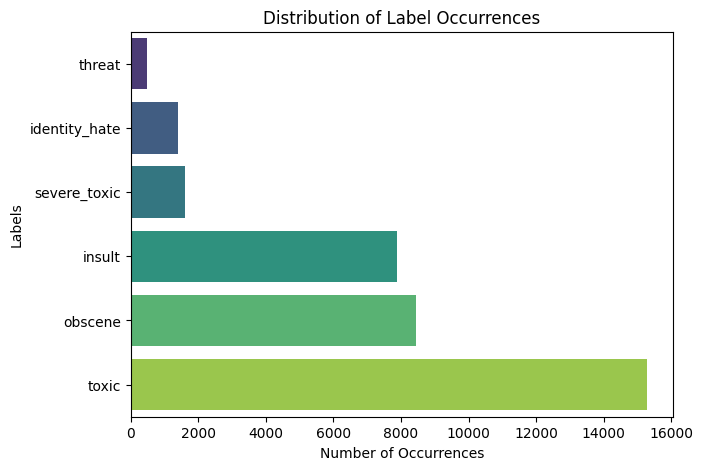

In [40]:
column_labels = df.columns.tolist()[2:]
label_counts = df[column_labels].sum().sort_values()


# Create a black background for the plot
plt.figure(figsize=(7, 5))

# Create a horizontal bar plot using Seaborn
ax = sns.barplot(x=label_counts.values,
                 y=label_counts.index, palette='viridis')


# Add labels and title to the plot
plt.xlabel('Number of Occurrences')
plt.ylabel('Labels')
plt.title('Distribution of Label Occurrences')

# Show the plot
plt.show()

In [41]:
# Token and Encode Function
def tokenize_and_encode(tokenizer, comments, labels, max_length=128):
    input_ids = []
    attention_masks = []

    for comment in comments:

        encoded_dict = tokenizer.encode_plus(
            comment,

            add_special_tokens=True,

            max_length=max_length,

            pad_to_max_length=True,

            return_attention_mask=True,

            return_tensors='pt'
        )

        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    labels = torch.tensor(labels, dtype=torch.float32)

    return input_ids, attention_masks, labels

# Initialize Tokenizer and Model


In [42]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [43]:
!nvidia-smi


Tue Nov  4 15:36:49 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.06             Driver Version: 535.183.06   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100 80GB PCIe          On  | 00000000:C3:00.0 Off |                   On |
| N/A   48C    P0              74W / 300W |                  N/A |     N/A      Default |
|                                         |                      |              Enabled |
+-----------------------------------------+----------------------+--

In [44]:
!pip install -U pip
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121


In [45]:
import torch

In [46]:
!pip install -qU "transformers==4.40.2" "safetensors==0.4.4"


In [47]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer

2025-11-04 15:36:55.573178: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-04 15:36:55.617654: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-04 15:36:55.617705: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-04 15:36:55.619595: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-04 15:36:55.628284: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

In [46]:
from transformers import BertTokenizer, TFAutoModelForSequenceClassification, AutoTokenizer

model_name = "bert-base-uncased"
MAX_LENGTH  = 128
NUM_LABELS  = 2                          
BATCH_SIZE  = 16
EPOCHS      = 2

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=NUM_LABELS,
    from_pt=False,         
    use_safetensors=False   
)


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2025-11-04 16:10:25.886465: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-04 16:10:26.043809: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-04 16:10:26.043876: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-04 16:10:26.060656: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register f

In [51]:
# Move model to GPU if available
device = torch.device(
    'cuda') if torch.cuda.is_available() else torch.device('cpu')


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [64]:
dataframe_sample = pd.read_csv('cleaned_training_sample.csv')

In [ ]:
dataframe_sample

In [ ]:
dataframe_sample.head(100).reset_index(drop=True)


In [56]:
pd.set_option('display.max_rows', None)

In [ ]:
dataframe_sample.head(200)

In [58]:
df_test = pd.read_csv('test.csv')

In [59]:
!pip install -q "tensorflow==2.15.0" "keras==2.15.0" "transformers==4.40.2"


In [68]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification


In [69]:

from sklearn.model_selection import train_test_split

label_cols = ['toxic']

texts  = dataframe_sample['anonymized_comment'].astype(str).values
labels = dataframe_sample[label_cols].values

tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_texts_tf(tokenizer, texts, max_length=128):
    enc = tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="tf"
    )
    
    return enc["input_ids"], enc["attention_mask"]

train_input_ids, train_attention_masks = tokenize_texts_tf(tokenizer, texts, max_length=MAX_LENGTH)
train_labels_tf = tf.convert_to_tensor(labels, dtype=tf.float32)

if 'df_test' in globals():
    test_texts = df_test['anonymized_comment'].astype(str).values \
                 if 'anonymized_comment' in df_test.columns else df_test['comment_text'].astype(str).values
    if all(col in df_test.columns for col in label_cols):
        test_labels_np = df_test[label_cols].astype("float32").values
        test_input_ids, test_attention_masks = tokenize_texts_tf(tokenizer, test_texts, max_length=MAX_LENGTH)
        test_labels_tf = tf.convert_to_tensor(test_labels_np, dtype=tf.float32)
    else:
        test_input_ids, test_attention_masks = tokenize_texts_tf(tokenizer, test_texts, max_length=MAX_LENGTH)
        test_labels_tf = None
else:
    test_input_ids = test_attention_masks = test_labels_tf = None

print("train:", train_input_ids.shape, train_labels_tf.shape)
print("val  : None (no split)")
print("test :", None if test_input_ids is None else (test_input_ids.shape, None if test_labels_tf is None else test_labels_tf.shape))


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


train: (10000, 128) (10000, 6)
val  : None (no split)
test : (TensorShape([153164, 128]), None)


In [70]:
train_ds = tf.data.Dataset.from_tensor_slices((
    {"input_ids": train_input_ids, "attention_mask": train_attention_masks},
    train_labels_tf
)).shuffle(len(texts)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

if test_input_ids is not None and test_labels_tf is not None:
    val_ds = tf.data.Dataset.from_tensor_slices((
        {"input_ids": test_input_ids, "attention_mask": test_attention_masks},
        test_labels_tf
    )).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
else:
    val_ds = None  # no validation if you don't have test labels



In [72]:
model = TFAutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=NUM_LABELS,
    from_pt=False,          
    use_safetensors=False   )

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.AUC(name="auc", multi_label=True), tf.keras.metrics.BinaryAccuracy(threshold=0.5)]
)



/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
if val_ds is not None:
    history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)
else:
    history = model.fit(train_ds, epochs=EPOCHS)



Epoch 1/2
 28/625 [>.............................] - ETA: 2:11:58 - loss: 0.5470 - auc: 0.5472 - binary_accuracy: 0.8099

In [ ]:
model.save_pretrained("./tox_multilabel_tf")
tokenizer.save_pretrained("./tox_multilabel_tf")
print(" Training finished & model saved")